# Actividad - K-Means

* **Nombre:** Juan Carlos Calderón García
* **Matrícula:** A01625696

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv("bestsellers with categories.csv")
dfcorr = pd.read_csv("bestsellers with categories.csv")
df.head(6)

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
5       George R. R. Martin          4.4    12643     11  2011      Fiction

El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [49]:
# Escribe el código necesario para realizar el análisis estadístico descrito
# anteriorment.
print(df.shape);
print("\n")
df.info()
print("\n")
df.describe()

(550, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
 7   Grupo        550 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB




User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

In [48]:
dfcorr = df.corr(numeric_only=True)
dfcorr

User Rating   Reviews     Price      Year
User Rating     1.000000 -0.001729 -0.133086  0.242383
Reviews        -0.001729  1.000000 -0.109182  0.263560
Price          -0.133086 -0.109182  1.000000 -0.153979
Year            0.242383  0.263560 -0.153979  1.000000

¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Considero que las todas las variables numéricas son relevantes para el análisis y el Género es una buena forma de agrupar los elementos a la hora de hacer el análisis gráfico.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

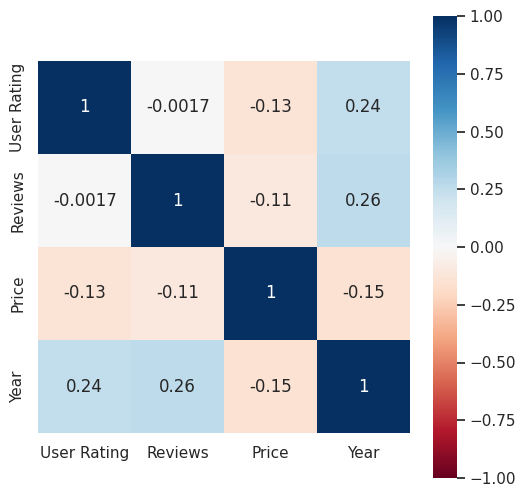

In [25]:
fig = plt.figure(figsize=(6,6))

sns.heatmap(data=dfcorr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True);

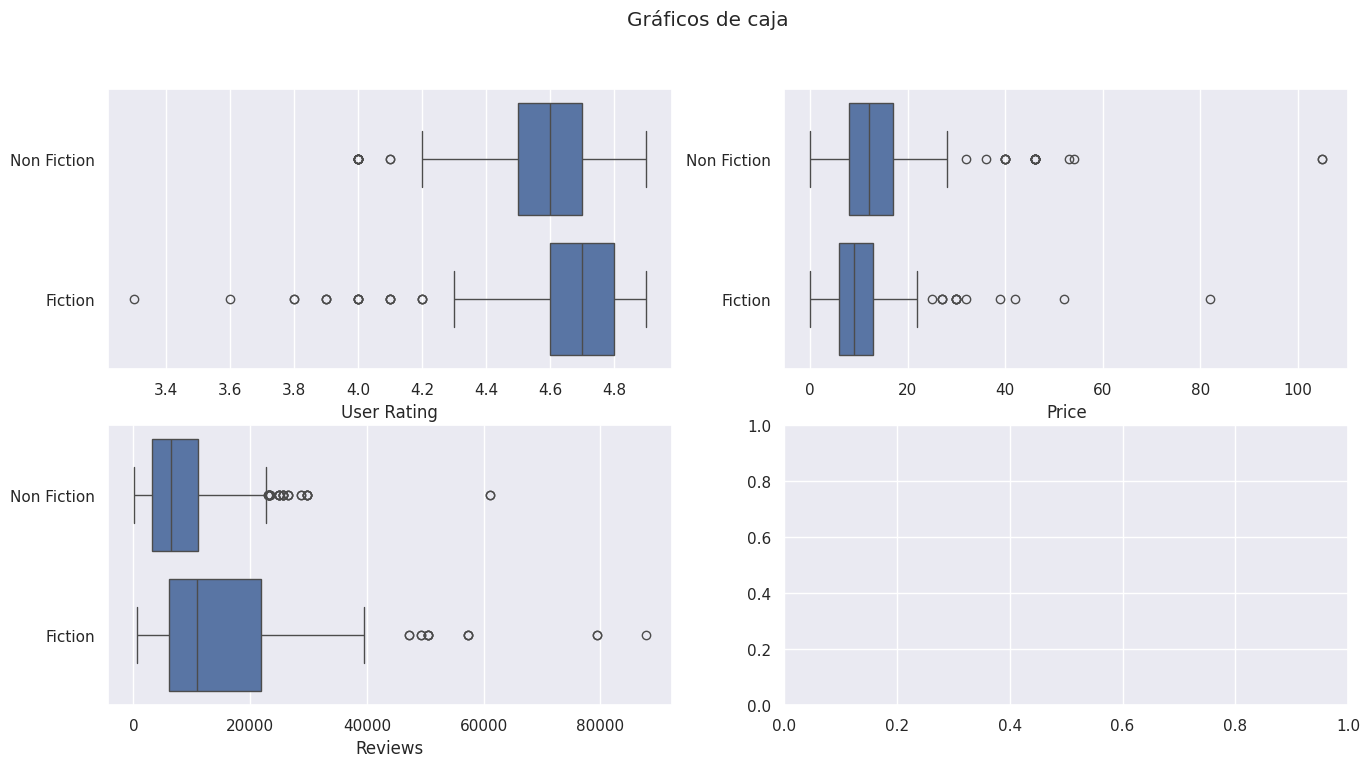

In [21]:
fig, axes = plt.subplots(2,2, figsize=(16,8));
fig.suptitle("Gráficos de caja");

sns.boxplot(ax = axes[0, 0], data=df, x="User Rating", y="Genre");

axes[0,0].set_ylabel("");
axes[0,0].set_title(" ");

sns.boxplot(ax = axes[1, 0], data=df, x="Reviews", y="Genre");

axes[1,0].set_ylabel("");
axes[1,0].set_title(" ");

sns.boxplot(ax = axes[0, 1], data=df, x="Price", y="Genre");

axes[0,1].set_ylabel("");
axes[0,1].set_title(" ");

<Figure size 600x400 with 0 Axes>

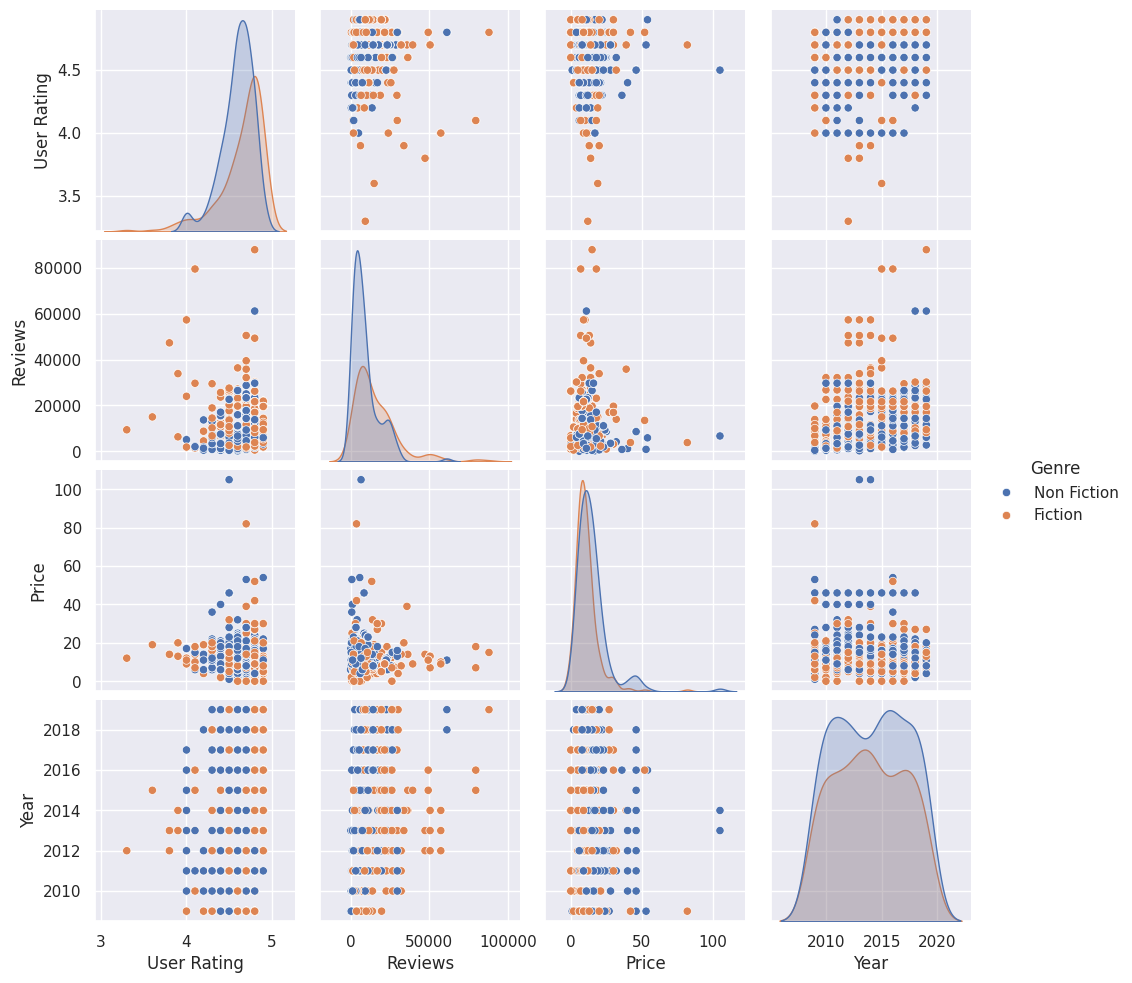

In [28]:
fig = plt.figure(figsize=(6,4));

sns.pairplot(data=df, hue="Genre");

Viendo el mapa de calor de todas las variables confirmé que todas las variables numéricas son relevantes para el análisis y ya que no estoy usando el nombre y el autor del libro considero que puedo eliminarlas.

Analizando los gráficos de caja y bigote se puede ver que si hay algunos datos extraños, pero no parece que tengan mucha importancia ya que ninguna de las variables está cagrada hacia el lado donde están esos datos extraños.

Y viendo los diagramas de dispersión el único lugar donde puedo ver posibles grupos es en el año y las calificaciones de los usuarios y veo 11 en el de año y 8 en el de calificaciones, pero creo que se podrían juntar varias líneas para crear menos grupos.

Como las variables no están en rangos similares y creo que eso si va a afectar ya que en algoritmos que necesiten comparar elementos entre si, como el de k means esta diferencia en las escalas puede generar problemas.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [3]:
# Implementa el algoritmo de kmeans y justifica la elección del número de
# clusters. Usa las variables numéricas.

#Normalizo los valores
columnas = ["User Rating", "Reviews", "Price", "Year"]
X = df.loc[:, columnas]

X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=columnas)

model = KMeans(n_clusters=6, random_state=47, n_init=10)
clusters = model.fit_predict(X_norm)

In [4]:
# Haz un análisis por grupo para determinar las características que los hace
# únicos. Ten en cuenta todas las variables numéricas.
df['Grupo'] = clusters.astype('str')

df.groupby('Grupo').mean(numeric_only=True)

User Rating       Reviews      Price         Year
Grupo                                                   
0         4.191803   8696.754098  12.786885  2012.655738
1         4.412500  58490.375000  11.687500  2014.687500
2         4.536000   7342.360000  50.400000  2012.920000
3         4.638068   5785.818182  13.125000  2010.971591
4         4.725664  23424.566372   9.265487  2015.442478
5         4.717610   7918.981132  10.194969  2016.943396

In [66]:
df.groupby('Grupo').std(numeric_only=True)

User Rating       Reviews      Price      Year
Grupo                                                
0         0.208403   7702.330954   4.665886  2.676349
1         0.411299  12743.848100   2.891799  2.358495
2         0.146856   7093.968417  18.779421  2.722132
3         0.124095   4604.885799   6.884870  1.561790
4         0.131461   4506.518467   4.777211  2.333521
5         0.140314   3883.125892   6.145368  1.588110

Creo que la mayoría de los grupos si pueden ser representativos de los datos ya que no cada grupo si es distinto, pero creo que se podría mejorar si reduzco la cantidad de grupos ya que veo algunos grupos con características muy similares como el 4 y 5, me decidí por 6 porque me basé en que pude ver 8 grupos viendo los gráficos de dispersión que incluían las calificaciones de los usuarios y decidí restar 2 porque supuse que existía la posibiliad de juntar algunos de esos grupos que vi en uno solo.


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

0.- Libros con una calificación de 4.1, aproximadamente 8500 reseñas, precio de 13\$ y que se lanzaron alrededor del 2012
<br>
1.- Libros con una calificación de 4.4, aproximadamente 60000 reseñas, precio de 12\$ y que se lanzaron alrededor del 2014
<br>
2.- Libros con una calificación de 4.5, aproximadamente 7000 reseñas, precio de 50\$ y que se lanzaron alrededor del 2012
<br>
3.- Libros con una calificación de 4.6, aproximadamente 6000 reseñas, precio de 13\$ y que se lanzaron alrededor del 2010
<br>
4.- Libros con una calificación de 4.7, aproximadamente 23000 reseñas, precio de 9\$ y que se lanzaron alrededor del 2015
<br>
5.- Libros con una calificación de 4.7, aproximadamente 8000 reseñas, precio de 10\$ y que se lanzaron alrededor del 2016

Text(0.5, 1.05, 'Grupos para libros')

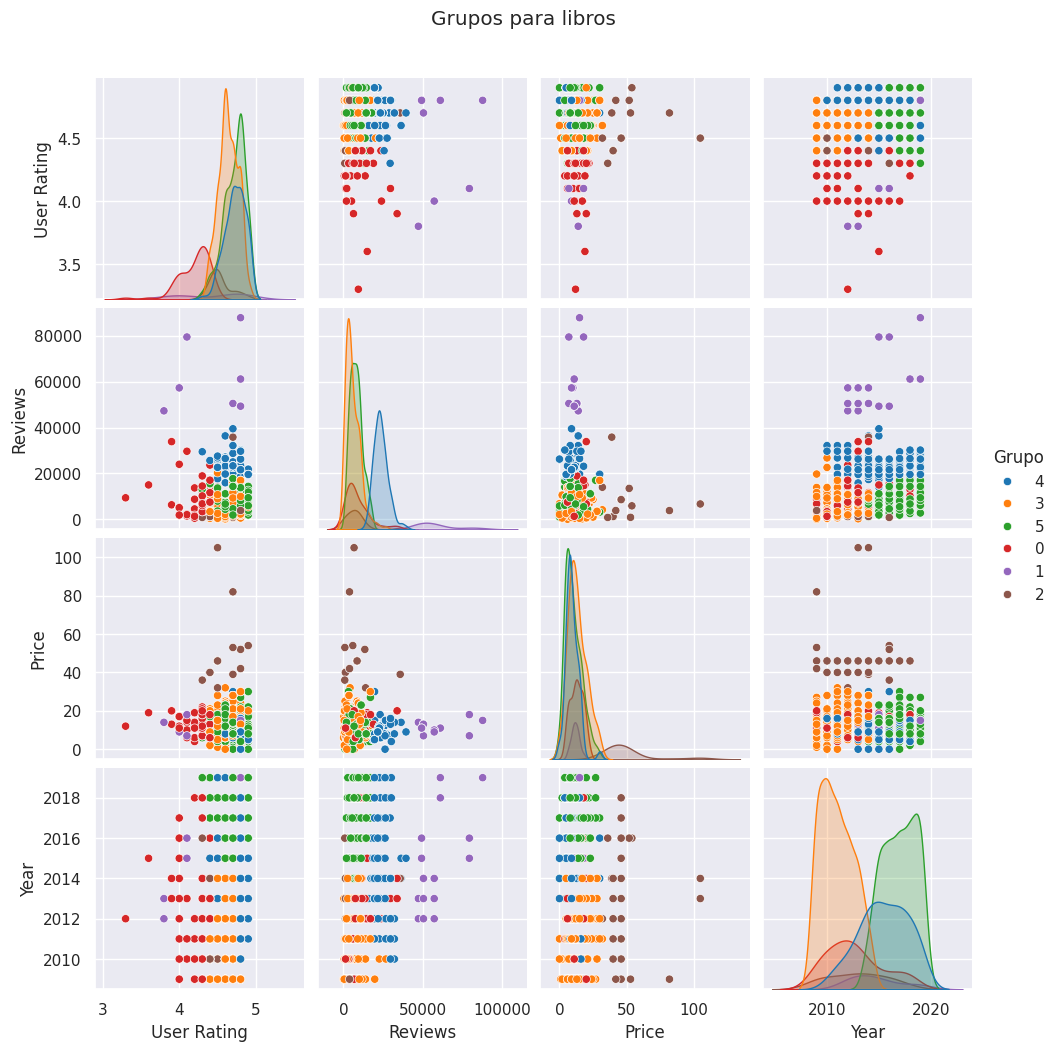

In [70]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('Grupos para libros', y=1.05)

In [5]:
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews',
                    z = 'Price',
                    title='Grupos para libros',
                    color='Grupo',
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

In [6]:
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews',
                    z = 'Year',
                    title='Grupos para libros',
                    color='Grupo',
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()